# Pandas Lesson Tutorial

In [1]:
# Load the Pandas and Numpy libraries

import pandas as pd
import numpy as np

print(pd.__version__); print(np.__version__)

1.1.3
1.19.2


## __1. Introduction to Pandas__

### Link to Pandas documentation: https://pandas.pydata.org/docs/index.html
### df.head(n): Show first n rows
### df.tail(n): Show last n rows

In [2]:
# Read in tsv
df = pd.read_csv("Pandas Lesson Datasets/gapminder.tsv", sep="\t")

# Get the first 5 rows of the dataset with df.head() function on the dataframe df
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# Get the last 3 rows of the dataset with df.tail()
df.tail(3)

,country,continent,year,lifeExp,pop,gdpPercap
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


### df.shape: Show the shape / dimensionality of the data frame

In [4]:
df.shape

(1704, 6)

### df.dtypes: Show columns' data types

In [5]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

### df[condition]: Extract subset of data

In [6]:
# Extract only the country and continent columns
df[["country", "continent"]]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [7]:
# Extract only rows with population more than 1000 million

df[df["pop"]>1000000000]

,country,continent,year,lifeExp,pop,gdpPercap
294,China,Asia,1982,65.525,1000281000,962.421380
295,China,Asia,1987,67.274,1084035000,1378.904018
296,China,Asia,1992,68.690,1164970000,1655.784158
297,China,Asia,1997,70.426,1230075000,2289.234136
298,China,Asia,2002,72.028,1280400000,3119.280896
299,China,Asia,2007,72.961,1318683096,4959.114854
706,India,Asia,2002,62.879,1034172547,1746.769454
707,India,Asia,2007,64.698,1110396331,2452.210407


In [8]:
# Here's a boolean mask for which rows have population more than 1000 million

df["pop"]>1000000

0       True
1       True
2       True
3       True
4       True
        ... 
1699    True
1700    True
1701    True
1702    True
1703    True
Name: pop, Length: 1704, dtype: bool

### df.to_csv(): Save a subset of the data

In [9]:
df1 = df[["country", "continent"]]
df2 = df[df["pop"]>1000000000]

In [10]:
df1.to_csv("df1_countryContinents.csv")
df2.to_csv("populatedCountries.csv")

## __2. Loading / Saving Data__

### __Loading Data:__

### pd.read_csv(): Load csv files
### pd.read_excel(): Load excel files
### pd.read_html(): Read HTML tables into a DataFrame object
### pd.read_json(): Convert JSON string to pandas object
### Reading SQL requires a few steps:
### a. Import library: from sqlalchemy import create_engine
### b. Link to the SQL database: engine = create_engine("URL")
### c. Read SQL table: sql_dataframe = pd.read_sql_table(): Read SQL database table into a DataFrame
### d. Read SQL query: sql_dataframe = pd.read_sql("SELECT * FROM table;", engine)

### __Saving Data:__

### df.to_csv(): Save DataFrame as csv
### df.to_excel(): Save DataFrame as excel file
### df.to_html(): Render DataFrame as an HTML table
### df.to_json(): Convert object to a JSON string
### Storing DataFrame to a SQL database requires a few steps:
### a. Import library: from sqlalchemy import create_engine
### b. Link to the SQL database: engine = create_engine("URL")
### df.to_sql("sql_tableName", engine): Write records stored in a DataFrame to a SQL database

## __3. Pandas Data Structure__

### There are 3 main Data Structures in Pandas: I. Series, II. DataFrame, III. Panel

### __I. Series:__

### Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects etc).
### The axis labels are collectively referred to as the index.
### Synatx: ser = pd.Series(data, index=idx)
### Where, data can be many different things: A Python dict, an ndarray, a scalar value (like 5) and index is a list of axis labels and are initialized differently depending on what the nature of data is.

### __A. Creating Series using Python Dictionary__

### If data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [11]:
# Index not passed, so index constructed from dict keys

currencyDict = {
    "US": "Dollar",
    "UK": "Pound",
    "Mexico": "Peso",
    "China": "Yuan"
}

currencySeries = pd.Series(currencyDict);
currencySeries

US        Dollar
UK         Pound
Mexico      Peso
China       Yuan
dtype: object

In [12]:
# Index passed, so values in data corresponds to the keys within the Index

currencyDict = {
    "US": "Dollar",
    "UK": "Pound",
    "Mexico": "Peso",
    "China": "Yuan"
}

currencyList = ["UK","US","China","Mexico"]

currencySeries = pd.Series(currencyDict, currencyList);
currencySeries

UK         Pound
US        Dollar
China       Yuan
Mexico      Peso
dtype: object

### __B. Creating Series using ndarray__

### If data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values [0, ..., len(data) - 1].


In [13]:
# Index provided

s = pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
s

a    0.570603
b   -0.010730
c    1.285162
d    0.300792
e    0.020329
dtype: float64

In [14]:
# Index not passed

s = pd.Series(np.random.randn(5))
s

0    0.105153
1    0.350055
2    0.738345
3    0.336349
4   -0.578130
dtype: float64

### __C. Creating Series using Scalar Values__

### If data is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [15]:
pd.Series(5, index=["a","b","c","d","e"])

a    5
b    5
c    5
d    5
e    5
dtype: int64

### __II. DataFrame__

### DataFrame is the most commonly used data structure in pandas
### DataFrame is a 2-dimensional labeled data structure
### You can think of it  like a spreadsheetor SQL table, or a dict of Series object
### The constructor accepts many different types of arguments: 2D Numpy array; Dictionary of 1D NumPy array or lists, dictionaries, or Series structures; Structured or record ndarray; Series structures; Another DataFrame structure

### Syntax: df = pd.DataFrame(data,index,columns)
### Where, data : numpy ndarray, dict, Series or DataFrame; index : Index to use for resulting frame. Default to np.arange(n); columns  : Column labels to use for resulting frame. Default to np.arange(n).

### __A. Create DataFrame using 3D Numpy Array__

In [16]:
# Create a 10x5 ndarray of random numbers
data = np.random.randn(10,5)
df = pd.DataFrame(data)

print(type(data));print(type(df));print(df)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
          0         1         2         3         4
0  1.598671  0.393085  0.222259 -1.976174 -0.873143
1  0.320520 -0.784206  0.574464  1.810193 -0.993991
2  1.399384 -0.322799  0.137642  0.711596 -0.643048
3  0.429948  0.178069 -1.719245  1.949424  0.400826
4  2.080931  2.477947  0.572975 -0.256740 -1.516768
5 -1.130676 -0.290129 -0.267172 -0.354043  0.000860
6  0.613713 -1.988911  0.156921 -2.328982  0.024360
7  1.175280  0.328034 -2.424100  0.864394 -0.452870
8 -0.747445  0.702555  0.230056 -2.746935  0.535330
9  0.689298 -2.382009  0.248733 -0.417120  0.288949


### __B. Create DataFrame using Dict of 1D Numpy Array__

In [17]:
np1 = np.array([1,2,3])
np2 = np.array([4,5,6])
np3 = np.array([7,8,9])

d = {
    "One": np1,
    "Two": np2,
    "Three": np3
}

df1 = pd.DataFrame(d)
df2 = pd.DataFrame(d, index=["A","B","C"])

print(df1);print(df2) # Column names of the DataFrame are derived automatically from the Dict keys

   One  Two  Three
0    1    4      7
1    2    5      8
2    3    6      9
   One  Two  Three
A    1    4      7
B    2    5      8
C    3    6      9


### __C. Create DataFrame using Dict of Lists__

In [18]:
d = {
    "Weights": [50,70.5,85.3,43.1],
    "Heights": [1.54,1.73,1.82,1.6]
}

df1 = pd.DataFrame(d)
df2 = pd.DataFrame(d,index=["Mary","John","Robert","Christine"])

print(df1);print(df2)

   Weights  Heights
0     50.0     1.54
1     70.5     1.73
2     85.3     1.82
3     43.1     1.60
           Weights  Heights
Mary          50.0     1.54
John          70.5     1.73
Robert        85.3     1.82
Christine     43.1     1.60


### __D. Create DataFrame with Dict of Series__

In [19]:
d = {
    "One": pd.Series([1,2,3], index=["A","B","C"]),
    "Two": pd.Series([1,2,3,4], index=["A","B","C","D"])
}

df = pd.DataFrame(d)
df

,One,Two
A,1.0,1
B,2.0,2
C,3.0,3
D,NaN,4


In [20]:
stockSummaries={
'AMZN':pd.Series([346.15, 589.8,158.88], index=['Closing price','P/E','Market Cap(B)']),
'GOOG':pd.Series([1133.43, 380.64], index=['Closing price','Market Cap(B)']),
'FB':pd.Series([61.48, 150.92], index=['Closing price','Market Cap(B)'])}

stockDF = pd.DataFrame(stockSummaries)
stockDF

,AMZN,GOOG,FB
Closing price,346.15,1133.43,61.48
Market Cap(B),158.88,380.64,150.92
P/E,589.80,NaN,NaN


### __E. Create DataFrame with Structured Record / Array__

In [21]:
data = [(1,2,"Hello"),(2,3,"World")]

df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data, index=["First","Second"], columns=["A","B","C"])

print(df1);print(df2)

   0  1      2
0  1  2  Hello
1  2  3  World
        A  B      C
First   1  2  Hello
Second  2  3  World


### __F. Create DataFrame with List of Dicts__

In [22]:
data = [
    {"A":1, "B":2},
    {"A":5, "B":10, "C":20}
]

df=pd.DataFrame(data)
df

,A,B,C
0,1,2,NaN
1,5,10,20.0


## __4. Retrieving Information__

### __I. Describing Basic Information__

### df.shape: Returns (rows, columns)
### df.index: Describe index
### df.columns: Describe DataFrame columns
### df.count(): Number of non NA values
### df.info(): Info on DataFrame
### df.dtypes: Data types

In [23]:
df = pd.read_csv("Pandas Lesson Datasets/gapminder.tsv", sep="\t")

print("df.shape:", df.shape, "\n")
print("df.index:", df.index, "\n")
print("df.columns:", df.columns, "\n")
print("df.count():", df.count(), "\n")
print("df.info():\n", df.info(), "\n")
print("df.dtypes:\n", df.dtypes, "\n")

df.shape: (1704, 6) 

df.index: RangeIndex(start=0, stop=1704, step=1) 

df.columns: Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object') 

df.count(): country      1704
continent    1704
year         1704
lifeExp      1704
pop          1704
gdpPercap    1704
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
df.info():
 None 

df.dtypes:
 country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object 



### __II. Describing Summary__

### df.sum(): Sum of values
### df.cumsum(): Cumulative sum of values
### df.min(), df.max(): Min / Max values
### df.idxmin(), df.idxmax(): Min / Max Value's Index Value
### df.describe: Summary Statistics
### df.mean(): Mean of values
### df.median(): Median of values

In [24]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")

print("df['weight'].sum():\n", df["weight"].sum(), "\n")
print("df['weight'].cumsum():\n", df["weight"].cumsum(), "\n")
print("df['weight'].min():\n", df["weight"].min(), "\n")
print("df['weight'].idxmin():\n", df["weight"].idxmin(), "\n")
print("df['weight'].max():\n", df["weight"].max(), "\n")
print("df['weight'].idxmax():\n", df["weight"].idxmax(), "\n")
print("df['weight'].describe():\n", df["weight"].describe(), "\n")
print("df['weight'].mean():\n", df["weight"].mean(), "\n")
print("df['weight'].median():\n", df["weight"].median(), "\n")

df['weight'].sum():
 328.8 

df['weight'].cumsum():
 0     45.5
1    110.5
2    160.5
3    235.5
4    285.5
5    328.8
Name: weight, dtype: float64 

df['weight'].min():
 43.3 

df['weight'].idxmin():
 5 

df['weight'].max():
 75.0 

df['weight'].idxmax():
 3 

df['weight'].describe():
 count     6.000000
mean     54.800000
std      12.465151
min      43.300000
25%      46.625000
50%      50.000000
75%      61.250000
max      75.000000
Name: weight, dtype: float64 

df['weight'].mean():
 54.800000000000004 

df['weight'].median():
 50.0 



## __5. Subsetting Columns__

### __I. General Ways to Subset Columns__

### df["colName"] or df.colName: Subset a single column by column name
### df[["colName1", "colName2", "colName3"]]: Subset multiple columns by column names
### df.loc[:, "A":"C"]: Subset range of columns by column names using loc
### df.iloc[:,2]: Subset single column by its index using iloc
### df.iloc[:, [0,-1]]: Subset multiple colmuns using their indices using iloc
### df.iloc[:, 0:2]: Subset a range of columns by index using iloc
### df.loc[:,"pop"]>1000000: Create derived columns using Boolean logic
### re = "^customer"; df.filter(regex=re): Subset columns whose names match a regex

### __II. Subset Columns via Column Name__

In [25]:
df = pd.read_csv("Pandas Lesson Datasets/gapminder.tsv", sep="\t")

# Subset single column by column name
df1=df["country"]
df2=df.country

print(df1);print(df2)

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object
0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object


In [26]:
# Subset multiple columns by column names
df3 = df[["country","continent","year"]]
df3

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
...,...,...,...
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002


In [27]:
# Subset a range of columns using loc
df4 = df.loc[:, "lifeExp":"gdpPercap"]
df4

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106
...,...,...,...
1699,62.351,9216418,706.157306
1700,60.377,10704340,693.420786
1701,46.809,11404948,792.449960
1702,39.989,11926563,672.038623


### __III. Subsetting Columns by Index__

In [28]:
# Subset single column by its index
df0 = df.iloc[:,0]
df0

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [29]:
# Subset multiple columns by their indices
df1 = df.iloc[:,[0,-1]]
df1

,country,gdpPercap
0,Afghanistan,779.445314
1,Afghanistan,820.853030
2,Afghanistan,853.100710
3,Afghanistan,836.197138
4,Afghanistan,739.981106
...,...,...
1699,Zimbabwe,706.157306
1700,Zimbabwe,693.420786
1701,Zimbabwe,792.449960
1702,Zimbabwe,672.038623


In [30]:
# Subset a range of columns using iloc
df2 = df.iloc[:,0:3]
df2

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972
...,...,...,...
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002


### __IV. Subsetting Columns by Boolean Logic__

In [31]:
df = pd.read_csv("Pandas Lesson Datasets/gapminder.tsv", sep="\t")
mask = df.loc[:,"pop"] > 10000000
mask

0       False
1       False
2        True
3        True
4        True
        ...  
1699    False
1700     True
1701     True
1702     True
1703     True
Name: pop, Length: 1704, dtype: bool

In [32]:
df[mask]

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
...,...,...,...,...,...,...
1691,Zambia,Africa,2007,42.384,11746035,1271.211593
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


### __V. Subsetting Columns by Regex__

In [33]:
df = pd.read_csv("Pandas Lesson Datasets/gapminder.tsv", sep="\t")

re1 = "\." # Match strings containing a period
re2 = "p$" # Match strings ending with p
re3 = "^c" # Match strings starting with c
re4 = "^c[1-5]$" # Match strings starting with c and ending with 1,2,3,4,5
re5 = "^(?!pop$)" # Matching strings except those containing pop

df=df.filter(regex=re2)
df

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106
...,...,...,...
1699,62.351,9216418,706.157306
1700,60.377,10704340,693.420786
1701,46.809,11404948,792.449960
1702,39.989,11926563,672.038623


## __6. Subsetting Rows__

### __I. General Ways to Subset Rows:__

### df.loc["a":"c"]: Select rows by label
### df.iloc[10:20,:]: Select rows by index
### df[df.Length>7]: Select rows by Boolean logic
### df.head(n): Select first n rows
### df.tail(n): Select last n rows
### df.sample(frac=0.5): Randomly select fraction of rows
### df.sample(n=10): Randonmly select n rows
### df.nlargest(n, "value"): Select and order top n entries
### df.nsmallest(n, "value"): Select and order bottom n entries
### df.drop_duplicates(): Select unique rows only (duplicates removed)

### __II. Subsetting Rows by Label__

In [34]:
df = pd.read_csv("Pandas Lesson Datasets/studentsdataset.csv", index_col="StudentID")
df.columns

Index(['StudentFirstName', 'StudentLastName', 'StudentCourse', 'StudentGender',
       'StudentClass'],
      dtype='object')

In [35]:
df # As you can see, StudentID is no longer a column

,StudentFirstName,StudentLastName,StudentCourse,StudentGender,StudentClass
StudentID,,,,,
1566159,Andrea,Haynes,DVEMG,Female,2A02
1570238,Lynda,Snyder,DDA,Female,2B22
1507382,Jackie,West,DMAT,Female,1B21
1569201,Verna,Houston,DVEMG,Female,2B21
1532537,Catherine,Payne,DISM,Male,3A01
...,...,...,...,...,...
1593514,Maria,Morrison,DDA,Female,3A02
1593329,Kari,Ross,DIT,Male,2B21
1503291,Marshall,Waters,DDA,Male,2B22


In [36]:
df1 = df.loc[1516045]
df1

StudentFirstName       Kay
StudentLastName     Burton
StudentCourse         DBIT
StudentGender       Female
StudentClass          2B21
Name: 1516045, dtype: object

In [37]:
df2 = df.loc[[1516045,1532537]]
df2

,StudentFirstName,StudentLastName,StudentCourse,StudentGender,StudentClass
StudentID,,,,,
1516045,Kay,Burton,DBIT,Female,2B21
1532537,Catherine,Payne,DISM,Male,3A01


In [38]:
df = pd.DataFrame(np.random.randn(6,4), index=list("abcdef"),columns=list("ABCD"))

df1 = df.loc["c":"f"]
df1

,A,B,C,D
c,-0.066338,0.176061,-0.273732,0.310831
d,-0.130292,-0.797463,1.923682,-0.278111
e,2.149715,-0.112280,0.246074,-1.191754
f,0.021368,0.124687,-0.826544,-0.054115


### __III. Subsetting Rows by Index__

In [39]:
df = pd.read_csv("Pandas Lesson Datasets/studentsdataset.csv", index_col="StudentID")

df1 = df.iloc[2]
df1

StudentFirstName    Jackie
StudentLastName       West
StudentCourse         DMAT
StudentGender       Female
StudentClass          1B21
Name: 1507382, dtype: object

In [40]:
df2 = df.iloc[[2,4,6]]
df2

,StudentFirstName,StudentLastName,StudentCourse,StudentGender,StudentClass
StudentID,,,,,
1507382,Jackie,West,DMAT,Female,1B21
1532537,Catherine,Payne,DISM,Male,3A01
1509165,Lynne,Vega,DVEMG,Female,3A01


### __IV. Subsetting Rows by Boolean Logic__

In [41]:
df = pd.read_csv("Pandas Lesson Datasets/studentsdataset.csv")

df1 = df[df.StudentCourse=="DBIT"]
df1

,StudentID,StudentFirstName,StudentLastName,StudentCourse,StudentGender,StudentClass
15,1516045,Kay,Burton,DBIT,Female,2B21
21,1557545,Mercedes,Doyle,DBIT,Male,1A02
23,1587345,Catherine,Padilla,DBIT,Female,3A01
26,1567542,Miguel,Mcdaniel,DBIT,Male,2A02
39,1598256,Darrel,Phelps,DBIT,Female,3B01
43,1582940,Kristopher,Henderson,DBIT,Female,1B22
45,1597031,Tami,LastName,DBIT,Female,1A01
47,1554750,Mack,Horton,DBIT,Female,2A02
48,1567078,Cecelia,Hardy,DBIT,Male,2B21
50,1539382,Guadalupe,Snyder,DBIT,Male,1B22


In [42]:
df2 = df[df["StudentCourse"].isin(["DBIT","DIT"])]
df2

,StudentID,StudentFirstName,StudentLastName,StudentCourse,StudentGender,StudentClass
11,1578445,Darrell,Gibson,DIT,Female,3B02
15,1516045,Kay,Burton,DBIT,Female,2B21
16,1545082,Tomas,Hammond,DIT,Male,2B22
20,1505690,Jason,Elliott,DIT,Male,2B22
21,1557545,Mercedes,Doyle,DBIT,Male,1A02
23,1587345,Catherine,Padilla,DBIT,Female,3A01
24,1574909,Patty,Sharp,DIT,Male,1A02
26,1567542,Miguel,Mcdaniel,DBIT,Male,2A02
29,1540095,Brendan,Burton,DIT,Male,2B21
30,1579718,Roberto,Gonzales,DIT,Male,2B22


### __V. Subsetting Rows by Regex__

In [43]:
df = pd.read_csv("Pandas Lesson Datasets/rainfall.csv")

re2017 = "^2017" # Regex for starts with 2017
df2017 = df[df.month.str.contains(re2017)]
df2017

,month,total_rainfall
420,2017-01,197.6
421,2017-02,158.4
422,2017-03,136.2
423,2017-04,208.6
424,2017-05,190.0
425,2017-06,106.0


## __7. Reshaping Data: Chagning Layout of Dataset__

### __I. General Ways to Reshape Datasets:__

### df.drop(["Length","Height"], axis=1): Drop columns from a DataFrame
### pd.concat: Append rows / columns to DataFrames
### pf.pivot: Spread rows into columns
### pd.melt: Gather columns into rows
### df.sort_values("col"): Sort DataFrame by column values
### df.sort_index(): Sort DataFrame by index values
### df.reindex(): Conform DataFrame to a new index
### df.reset_index(): Reset index of a DataFrame
### df.rename(columns={"y":"year"}): rename the columns of a DataFrame

### __II. Drop Columns from a DataFrame__

In [44]:
df = pd.read_csv("Pandas Lesson Datasets/euro_winners.csv")
df.head(5)

,Season,Nation,Winners,Score,Runners-up,Runner-UpNation,Venue,Attendance
0,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes,Paris",38239
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium,Brussels",67000
3,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion,Stuttgart",72000
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,"Hampden Park,Glasgow",127621


In [45]:
df2 = df.drop(["Runners-up", "Runner-UpNation", "Venue", "Attendance"], axis=1)
df2.head(5) # So we dropped the 4 columns from the DataFrame

,Season,Nation,Winners,Score
0,1955–56,Spain,Real Madrid,4–3
1,1956–57,Spain,Real Madrid,2–0
2,1957–58,Spain,Real Madrid,3–2
3,1958–59,Spain,Real Madrid,2–0
4,1959–60,Spain,Real Madrid,7–3


### __III. Append Rows to DataFrame__

In [46]:
df1 = pd.read_csv("Pandas Lesson Datasets/Weights1.csv", index_col=["name"])
df2 = pd.read_csv("Pandas Lesson Datasets/Weights2.csv", index_col=["name"])
print(df1);print(df2)

       weight gender
name                
Mary     45.5      f
John     65.0      m
Anna     50.0      f
Bryan    75.0      m
Rob      50.0      m
Kay      43.3      f
        weight gender
name                 
Calvin    89.3      m
Peter     55.1      m
Julia     41.1      f


In [47]:
pd.concat([df1,df2])

,weight,gender
name,,
Mary,45.5,f
John,65.0,m
Anna,50.0,f
Bryan,75.0,m
Rob,50.0,m
Kay,43.3,f
Calvin,89.3,m
Peter,55.1,m
Julia,41.1,f


### __IV. Append Columns to DataFrame__

In [48]:
df1 = pd.read_csv("Pandas Lesson Datasets/Weights1.csv", index_col=["name"])
# df2 = pd.read_csv("Pandas Lesson Datasets/Heights2.csv", index_col=["name"]) # Heights2.csv is missing

pd.concat([df1,df2])

,weight,gender
name,,
Mary,45.5,f
John,65.0,m
Anna,50.0,f
Bryan,75.0,m
Rob,50.0,m
Kay,43.3,f
Calvin,89.3,m
Peter,55.1,m
Julia,41.1,f


### __V. Spread Rows into Columns__

In [49]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")
df

,observation,weight,gender
0,1,45.5,f
1,2,65.0,m
2,3,50.0,f
3,4,75.0,m
4,5,50.0,m
5,6,43.3,f


In [50]:
df.pivot(index="observation", columns="gender", values="weight")

gender,f,m
observation,,
1,45.5,NaN
2,NaN,65.0
3,50.0,NaN
4,NaN,75.0
5,NaN,50.0
6,43.3,NaN


### __VI. Gather Columns into Rows__

In [51]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")
pd.melt(df, id_vars=["observation","gender"])

,observation,gender,variable,value
0,1,f,weight,45.5
1,2,m,weight,65.0
2,3,f,weight,50.0
3,4,m,weight,75.0
4,5,m,weight,50.0
5,6,f,weight,43.3


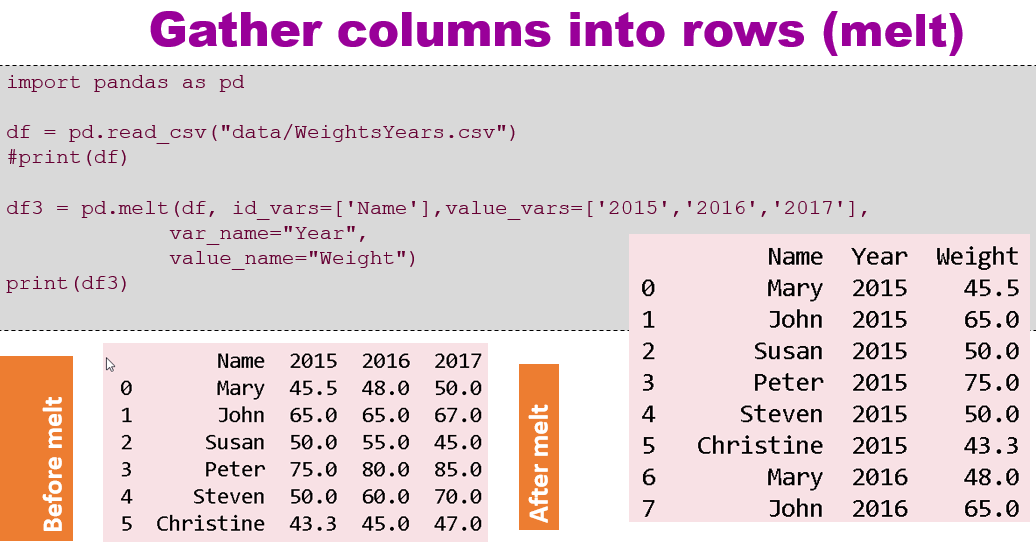

### __VII. Sort DataFrame by Column Values__

In [52]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")
df

,observation,weight,gender
0,1,45.5,f
1,2,65.0,m
2,3,50.0,f
3,4,75.0,m
4,5,50.0,m
5,6,43.3,f


In [53]:
df.sort_values(by="weight")

,observation,weight,gender
5,6,43.3,f
0,1,45.5,f
2,3,50.0,f
4,5,50.0,m
1,2,65.0,m
3,4,75.0,m


### __VIII. Sort DataFrame by Index Values__

In [54]:
dates = pd.date_range("20130101", periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.374695,0.433111,0.217370,-1.269818
2013-01-02,-0.660980,1.690636,0.041397,0.003720
2013-01-03,1.328147,0.336031,-0.474054,2.065655
2013-01-04,-0.556102,-0.296135,-0.443748,0.290399
2013-01-05,2.356798,-0.367636,0.053318,1.191760
2013-01-06,1.587856,0.292425,-1.993648,0.936028


In [55]:
df.sort_index(ascending=False)

,A,B,C,D
2013-01-06,1.587856,0.292425,-1.993648,0.936028
2013-01-05,2.356798,-0.367636,0.053318,1.191760
2013-01-04,-0.556102,-0.296135,-0.443748,0.290399
2013-01-03,1.328147,0.336031,-0.474054,2.065655
2013-01-02,-0.660980,1.690636,0.041397,0.003720
2013-01-01,-0.374695,0.433111,0.217370,-1.269818


In [56]:
df = pd.read_csv("Pandas Lesson Datasets/stock_index_prices.csv")
df.head(3)

,TradingDate,PriceType,Nasdaq,S&P 500,Russell 2000
0,2014/02/21,open,4282.17,1841.07,1166.25
1,2014/02/21,close,4263.41,1836.25,1164.63
2,2014/02/21,high,4284.85,1846.13,1168.43


In [57]:
df2 = df.set_index(["TradingDate","PriceType"]) # Sets index to the DataFrame
df2.head(6)

Nasdaq  S&P 500  Russell 2000
TradingDate PriceType                                
2014/02/21  open       4282.17  1841.07       1166.25
            close      4263.41  1836.25       1164.63
            high       4284.85  1846.13       1168.43
2014/02/24  open       4273.32  1836.78       1166.74
            close      4292.97  1847.61       1174.55
            high       4311.13  1858.71       1180.29

In [58]:
df2.sort_index(ascending=False,level="PriceType") # Now, we sort by PriceType

,,Nasdaq,S&P 500,Russell 2000
TradingDate,PriceType,,,
2014/02/28,open,4323.52,1855.12,1189.19
2014/02/27,open,4291.47,1844.90,1179.28
2014/02/26,open,4300.45,1845.79,1176.11
2014/02/25,open,4298.48,1847.66,1176.00
2014/02/24,open,4273.32,1836.78,1166.74
2014/02/21,open,4282.17,1841.07,1166.25
2014/02/28,high,4342.59,1867.92,1193.50
2014/02/27,high,4322.46,1854.53,1187.94
2014/02/26,high,4316.82,1852.65,1188.06


### __IX. Reindex a DataFrame__

In [59]:
index = ["Firefox", "Chrome", "Safari", "IE10", "Konqueror"]
df = pd.DataFrame({
    "http_status": [200,200,404,404,301],
    "response_time": [0.04,0.02,0.07,0.08,1.0]
}, index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [60]:
df.reindex(["Safari","Ice Weasel","Comodo Dragon","IE10","Chrome"])

,http_status,response_time
Safari,404.0,0.07
Ice Weasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


### __X. Reset Index of a DataFrame__

In [61]:
df = pd.read_csv("Pandas Lesson Datasets/stock_index_prices.csv")
df = df.set_index(["TradingDate","PriceType"])
df

Nasdaq  S&P 500  Russell 2000
TradingDate PriceType                                
2014/02/21  open       4282.17  1841.07       1166.25
            close      4263.41  1836.25       1164.63
            high       4284.85  1846.13       1168.43
2014/02/24  open       4273.32  1836.78       1166.74
            close      4292.97  1847.61       1174.55
            high       4311.13  1858.71       1180.29
2014/02/25  open       4298.48  1847.66       1176.00
            close      4287.59  1845.12       1173.95
            high       4307.51  1852.91       1179.43
2014/02/26  open       4300.45  1845.79       1176.11
            close      4292.06  1845.16       1181.72
            high       4316.82  1852.65       1188.06
2014/02/27  open       4291.47  1844.90       1179.28
            close      4318.93  1854.29       1187.94
            high       4322.46  1854.53       1187.94
2014/02/28  open       4323.52  1855.12       1189.19
            close      4308.12  1859.45       1183.03
            high       4342.59  1867.92       1193.50

In [62]:
df.reset_index()

,TradingDate,PriceType,Nasdaq,S&P 500,Russell 2000
0,2014/02/21,open,4282.17,1841.07,1166.25
1,2014/02/21,close,4263.41,1836.25,1164.63
2,2014/02/21,high,4284.85,1846.13,1168.43
3,2014/02/24,open,4273.32,1836.78,1166.74
4,2014/02/24,close,4292.97,1847.61,1174.55
5,2014/02/24,high,4311.13,1858.71,1180.29
6,2014/02/25,open,4298.48,1847.66,1176.00
7,2014/02/25,close,4287.59,1845.12,1173.95
8,2014/02/25,high,4307.51,1852.91,1179.43
9,2014/02/26,open,4300.45,1845.79,1176.11


### __XI. Rename Columns of a DataFrame__

In [63]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")
df

,observation,weight,gender
0,1,45.5,f
1,2,65.0,m
2,3,50.0,f
3,4,75.0,m
4,5,50.0,m
5,6,43.3,f


In [64]:
df.rename(columns={"observation":"reading"})

,reading,weight,gender
0,1,45.5,f
1,2,65.0,m
2,3,50.0,f
3,4,75.0,m
4,5,50.0,m
5,6,43.3,f


## __8. Handling Missing Data__

### __I. General Ways of Handling Missing Data:__

### df.isnull(): Detect missing values (NaN in numeric arrays, None / NaN in object arrays)
### df.notnull(): Detect existing non-missing values. Return a boolean same-sized object indicating if the values are not NA. Non-missing values get mapped to True. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True). NA values, such as None or numpy.NaN, get mapped to False values.
### df.dropna(): Drop rows with any column having NA / null data
### df.fillna(): Fill NA / NaN values using specified method

### __II. isnull() / notnull()__

### To make detecting missing values easier (and across different array dtypes), pandas provides the isnull() and notnull() functions, which are also methods on Series and DataFrame objects

In [65]:
df = pd.read_csv("Pandas Lesson Datasets/Weights.csv")
pd.isnull(df.weight)

0    False
1    False
2    False
3    False
4    False
5    False
Name: weight, dtype: bool

In [66]:
pd.notnull(df.weight)

0    True
1    True
2    True
3    True
4    True
5    True
Name: weight, dtype: bool

### __III. dropna()__

In [67]:
df = pd.read_csv("Pandas Lesson Datasets/kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [68]:
df.dropna().head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


### __VI. fillna()__

### fillna() can fill in NA values in 3 ways: A. Scalar Values, B. Fill gaps forwards, C. Fill gaps backwards

In [69]:
df = pd.read_csv("Pandas Lesson Datasets/kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [70]:
# Replace NA with a scalar value
df.fillna(0).head(5) # See row 1 and 2, column "rc", values are now 0 instead of NaN

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,...,38,6000,0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [71]:
df.fillna(method="pad").head(5) # Row 1 and 2, column "rc", now follow the "rc" value of 5.2 taken from row 0

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [72]:
df.fillna(method="bfill").head(5) # Row 1 and 2, column "rc", now follow the "rc" value of 3.9 taken from row 3

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### __VII. fillna(mean)__

In [73]:
df = pd.read_csv("Pandas Lesson Datasets/kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [74]:
df.info() # For each column you can check which has issues with Null values
df.isnull() # Or you can check with the isnull() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# Since "rc" column has plenty of Null values, we want to convert it to a numeric type before fixing it
df["rc"] = pd.to_numeric(df["rc"], errors="coerce")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [76]:
df.fillna(df.mean()).head(5) # Now, rows 1 and 2 for column "rc" is populate with mean value of rc

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.600000,no,no,no,good,no,no,ckd


## __9. Combine Data Sets__

### __I. General Way of Combining Data Sets:__

### pd.merge(adf, bdf, how='left', on='x1'): Get all rows from adf and only those rows from bdf that have a match with adf on the column x1
### pd.merge(adf, bdf, how='right', on='x1'): Get all rows from bdf and only those rows from adf that have a match with bdf on the column x1
### pd.merge(adf, bdf, how='inner', on='x1'): Join matching rows from both adf and bdf
### pd.merge(adf, bdf, how='outer', on='x1'): Join all rows from adf and bdf
### adf[adf.x1.isin(bdf.x1)]: All rows in adf that have a match in bdf.
### adf[~adf.x1.isin(bdf.x1)]: All rows in adf that do not have a match in bdf

### __II. pd.merge() left / right (basically like SQL LEFT / RIGHT JOIN)__

In [77]:
df1 = pd.read_csv("Pandas Lesson Datasets/mergedataset1s.csv")
df1

,transactionid,amount,customerid,datetransaction
0,1,85,101,1 Jan 2017
1,9,401,105,11 Jan 2017
2,11,202,106,11 Jan 2017
3,12,823,102,12 Jan 2017
4,13,720,107,12 Jan 2017
5,14,399,104,13 Jan 2017
6,51,344,109,31 Jan 2017
7,52,190,110,31 Jan 2017


In [78]:
df2 = pd.read_csv("Pandas Lesson Datasets/mergedataset2s.csv")
df2

,customerid,name,region
0,100,Mary,north
1,101,John,south
2,102,Brenda,south
3,103,Chad,central
4,104,Tanya,west
5,105,Simon,east
6,106,Leonardo,north


In [79]:
# merge (how="left")
pd.merge(df1, df2, how="left", on="customerid") # Like SQL Left Join

,transactionid,amount,customerid,datetransaction,name,region
0,1,85,101,1 Jan 2017,John,south
1,9,401,105,11 Jan 2017,Simon,east
2,11,202,106,11 Jan 2017,Leonardo,north
3,12,823,102,12 Jan 2017,Brenda,south
4,13,720,107,12 Jan 2017,NaN,NaN
5,14,399,104,13 Jan 2017,Tanya,west
6,51,344,109,31 Jan 2017,NaN,NaN
7,52,190,110,31 Jan 2017,NaN,NaN


In [80]:
# merge (how="right")
pd.merge(df1, df2, how="right", on="customerid") # Like SQL Right Join

,transactionid,amount,customerid,datetransaction,name,region
0,NaN,NaN,100,NaN,Mary,north
1,1.0,85.0,101,1 Jan 2017,John,south
2,12.0,823.0,102,12 Jan 2017,Brenda,south
3,NaN,NaN,103,NaN,Chad,central
4,14.0,399.0,104,13 Jan 2017,Tanya,west
5,9.0,401.0,105,11 Jan 2017,Simon,east
6,11.0,202.0,106,11 Jan 2017,Leonardo,north


### __III. pd.merge() inner / outer (basically like SQL INNER / OUTER JOIN)__

In [81]:
# merge (how="inner")
pd.merge(df1, df2, how="inner", on="customerid") # Like SQL Inner Join

,transactionid,amount,customerid,datetransaction,name,region
0,1,85,101,1 Jan 2017,John,south
1,9,401,105,11 Jan 2017,Simon,east
2,11,202,106,11 Jan 2017,Leonardo,north
3,12,823,102,12 Jan 2017,Brenda,south
4,14,399,104,13 Jan 2017,Tanya,west


In [82]:
# merge (how="outer")
pd.merge(df1, df2, how="outer", on="customerid") # Like SQL Outer Join

,transactionid,amount,customerid,datetransaction,name,region
0,1.0,85.0,101,1 Jan 2017,John,south
1,9.0,401.0,105,11 Jan 2017,Simon,east
2,11.0,202.0,106,11 Jan 2017,Leonardo,north
3,12.0,823.0,102,12 Jan 2017,Brenda,south
4,13.0,720.0,107,12 Jan 2017,NaN,NaN
5,14.0,399.0,104,13 Jan 2017,Tanya,west
6,51.0,344.0,109,31 Jan 2017,NaN,NaN
7,52.0,190.0,110,31 Jan 2017,NaN,NaN
8,NaN,NaN,100,NaN,Mary,north
9,NaN,NaN,103,NaN,Chad,central


### __IV. isin()__

In [83]:
df1 = pd.read_csv("Pandas Lesson Datasets/mergedataset1s.csv")
df2 = pd.read_csv("Pandas Lesson Datasets/mergedataset2s.csv")

df1[df1.customerid.isin(df2.customerid)] #  All rows in df1.customerid that have a match in df2.customerid
# kinda like Inner Join

,transactionid,amount,customerid,datetransaction
0,1,85,101,1 Jan 2017
1,9,401,105,11 Jan 2017
2,11,202,106,11 Jan 2017
3,12,823,102,12 Jan 2017
5,14,399,104,13 Jan 2017


### __V. ~isin(): Not In__

In [84]:
df1 = pd.read_csv("Pandas Lesson Datasets/mergedataset1s.csv")
df2 = pd.read_csv("Pandas Lesson Datasets/mergedataset2s.csv")

df1[~df1.customerid.isin(df2.customerid)] # All rows in df1.customerid that do not have a match in df2.customerid
# kinda like Left Join with Where

,transactionid,amount,customerid,datetransaction
4,13,720,107,12 Jan 2017
6,51,344,109,31 Jan 2017
7,52,190,110,31 Jan 2017


## __10. Group Data__

### __I. General Ways to Group Data (alot like SQL):__

### df1 = df.groupby(by='col): Return a GroupBy object, grouped by values in column named 'col'
### df1 = df.groupby(level='ind'): Return a GroupBy object, grouped by values in index level named 'ind'
### df1.groups: The dictionary of groups
### len(df1.groups): Number of groups in the dictionary
### size(): Size of each group
### agg(function): Aggregate group using function

In [85]:
df = pd.read_csv("Pandas Lesson Datasets/euro_winners.csv")
df.head(5)

,Season,Nation,Winners,Score,Runners-up,Runner-UpNation,Venue,Attendance
0,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes,Paris",38239
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium,Brussels",67000
3,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion,Stuttgart",72000
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,Germany,"Hampden Park,Glasgow",127621


In [86]:
# Returns dictionary of DataFrameGroupBy objects
nationsGrp = df.groupby(["Nation"])
nationsGrp

In [87]:
# Finds out the size of each element within the DataFrameGroupBy object
nationWins = nationsGrp.size()
nationWins.sort_values(ascending=False)

Nation
Spain          13
Italy          12
England        12
Germany         7
Netherlands     6
Portugal        4
Yugoslavia      1
Scotland        1
Romania         1
France          1
dtype: int64

### __II. Multi-Columns GroupBy__

In [88]:
df = pd.read_csv("Pandas Lesson Datasets/euro_winners.csv")
winnersGrp = df.groupby(["Nation","Winners"])
winnersGrp

In [89]:
clubWins = winnersGrp.size()
clubWins.sort_values(ascending=False)

Nation       Winners          
Spain        Real Madrid          9
Italy        Milan                7
Germany      Bayern Munich        5
England      Liverpool            5
Spain        Barcelona            4
Netherlands  Ajax                 4
England      Manchester United    3
Italy        Internazionale       3
             Juventus             2
Portugal     Porto                2
             Benfica              2
England      Nottingham Forest    2
             Chelsea              1
France       Marseille            1
Yugoslavia   Red Star Belgrade    1
Germany      Borussia Dortmund    1
             Hamburg              1
Netherlands  Feyenoord            1
             PSV Eindhoven        1
Romania      Steaua Bucure?ti     1
Scotland     Celtic               1
England      Aston Villa          1
dtype: int64

## __11. Applying Functions to Pandas Series and DataFrames (these 2 Data Types)__

### __I. Applying Functions to Pandas Series__

In [90]:
series = pd.Series([20,21,12], index=["London","New York","Helsinki"])

series

London      20
New York    21
Helsinki    12
dtype: int64

In [91]:
# Create a function to calculate Fahrenheit presumably
def toFahrenheit(x):
    return x*32

series.apply(toFahrenheit)

London      640
New York    672
Helsinki    384
dtype: int64

### __II. Applying Functions to Pandas DataFrames__

In [92]:
data = np.random.randint(1,10,(3,2))
data

array([[7, 5],
       [4, 2],
       [7, 3]])

In [93]:
df = pd.DataFrame(data, index=["Student 1", "Student 2", "Student 3"], columns=["Reward 1", "Reward 2"])
df

,Reward 1,Reward 2
Student 1,7,5
Student 2,4,2
Student 3,7,3


In [94]:
def multiply(x):
    return x*2

df.apply(multiply)

,Reward 1,Reward 2
Student 1,14,10
Student 2,8,4
Student 3,14,6


### __III. Applying Lambda Functions to Pandas DataFrames__

### _A lambda function is a small anonymous function. A lambda function can take any number of arguments, but can only have one expression.See more about Python Lambda Function here: https://www.w3schools.com/python/python_lambda.asp_
### In this example, you get 13:
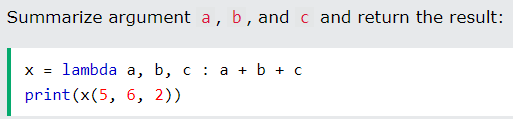

In [95]:
data = {
    "Name": ["Jason", "Molly", "Tina", "Jake", "Amy"],
    "Year": [1989, 1990, 1994, 1979, 1975]
}
df = pd.DataFrame(data)
df

,Name,Year
0,Jason,1989
1,Molly,1990
2,Tina,1994
3,Jake,1979
4,Amy,1975


In [96]:
# Create a capitalization lambda function

caps = lambda x: x.upper()
df["Name"].apply(caps) # Apply the caps function over the "Name" column

0    JASON
1    MOLLY
2     TINA
3     JAKE
4      AMY
Name: Name, dtype: object

### The End.
### Thank You!